In [21]:
%matplotlib inline

In [22]:
from keras.layers import merge, Deconvolution2D, UpSampling2D, Convolution2D, MaxPooling2D, Input, Dense, Flatten, BatchNormalization, LeakyReLU
from keras.models import Model
import os

nBottleneck = 25
batchSz = 32

imDim = 256

# first, define the encoder
imageInput = Input(shape=(imDim, imDim, 3))

# imDim x imDim input
x = Convolution2D(32, 4, 4, subsample=(2, 2), border_mode='same', dim_ordering='tf')(imageInput)
x = BatchNormalization(mode=2)(x)
x = LeakyReLU(alpha=0.2)(x)

# 128 x 128 input
x = Convolution2D(32, 4, 4, subsample=(2, 2), border_mode='same', dim_ordering='tf')(x)
x = BatchNormalization(mode=2)(x)
x = LeakyReLU(alpha=0.2)(x)

# 64 x 64 input
x = Convolution2D(32, 4, 4, subsample=(2, 2), border_mode='same', dim_ordering='tf')(x)
x = BatchNormalization(mode=2)(x)
x = LeakyReLU(alpha=0.2)(x)

# 32 x 32 input
x = Convolution2D(64, 4, 4, subsample=(2, 2), border_mode='same', dim_ordering='tf')(x)
x = BatchNormalization(mode=2)(x)
x = LeakyReLU(alpha=0.2)(x)

# 16 x 16 input
x = Convolution2D(128, 4, 4, subsample=(2, 2), border_mode='same', dim_ordering='tf')(x)
x = BatchNormalization(mode=2)(x)
x = LeakyReLU(alpha=0.2)(x)

# 8 x 8 input
x = Convolution2D(128, 4, 4, subsample=(2, 2), border_mode='same', dim_ordering='tf')(x)
x = BatchNormalization(mode=2)(x)
x = LeakyReLU(alpha=0.2)(x)

# 4 x 4 input
encodedFeatures = Convolution2D(nBottleneck, 4, 4, subsample=(1, 1), border_mode='valid', dim_ordering='tf')(x)

encoder_model = Model(imageInput, encodedFeatures, name='Encoder')
encoder_model.summary()

# # then define the tell-digits-apart model
# digit_a = Input(shape=(1, 27, 27))
# digit_b = Input(shape=(1, 27, 27))

# # the vision model will be shared, weights and all
# out_a = vision_model(digit_a)
# out_b = vision_model(digit_b)

# concatenated = merge([out_a, out_b], mode='concat')
# out = Dense(1, activation='sigmoid')(concatenated)

# classification_model = Model([digit_a, digit_b], out)

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_5 (InputLayer)             (None, 256, 256, 3)   0                                            
____________________________________________________________________________________________________
convolution2d_29 (Convolution2D) (None, 128, 128, 32)  1568        input_5[0][0]                    
____________________________________________________________________________________________________
batchnormalization_25 (BatchNorma(None, 128, 128, 32)  64          convolution2d_29[0][0]           
____________________________________________________________________________________________________
leakyrelu_25 (LeakyReLU)         (None, 128, 128, 32)  0           batchnormalization_25[0][0]      
___________________________________________________________________________________________

In [23]:
# decoder_model 
encoded_input = Input(shape=(1,1,nBottleneck))

# 1,1,2000 input
x = UpSampling2D(size=(4,4),dim_ordering='tf')(encoded_input)
x = Convolution2D(128, 4, 4, subsample=(1, 1), border_mode='same', dim_ordering='tf')(x)
x = BatchNormalization(mode=2)(x)
x = LeakyReLU(alpha=0.2)(x)

# 4x4x512 input
x = Convolution2D(128, 4, 4, subsample=(1, 1), border_mode='same', dim_ordering='tf')(x)
x = UpSampling2D(size=(2,2),dim_ordering='tf')(x)
x = BatchNormalization(mode=2)(x)
x = LeakyReLU(alpha=0.2)(x)

# 8x8ximDim input
x = Convolution2D(64, 4, 4, subsample=(1, 1), border_mode='same', dim_ordering='tf')(x)
x = UpSampling2D(size=(2,2),dim_ordering='tf')(x)
x = BatchNormalization(mode=2)(x)
x = LeakyReLU(alpha=0.2)(x)

# 16x16ximDim input
x = Convolution2D(64, 4, 4, subsample=(1, 1), border_mode='same', dim_ordering='tf')(x)
x = UpSampling2D(size=(2,2),dim_ordering='tf')(x)
x = BatchNormalization(mode=2)(x)
x = LeakyReLU(alpha=0.2)(x)

# 32x32x128 input
x = Convolution2D(64, 4, 4, subsample=(1, 1), border_mode='same', dim_ordering='tf')(x)
x = UpSampling2D(size=(2,2),dim_ordering='tf')(x)
x = BatchNormalization(mode=2)(x)
x = LeakyReLU(alpha=0.2)(x)

# 64x64x64 input
x = Convolution2D(32, 4, 4, subsample=(1, 1), border_mode='same', dim_ordering='tf')(x)
x = UpSampling2D(size=(2,2),dim_ordering='tf')(x)
x = BatchNormalization(mode=2)(x)
x = LeakyReLU(alpha=0.2)(x)

# 128x128x64 input
x = Convolution2D(3, 4, 4, subsample=(1, 1), border_mode='same', dim_ordering='tf')(x)
x = UpSampling2D(size=(2,2),dim_ordering='tf')(x)

generator_model = Model(encoded_input,x,name="Decoder")
generator_model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_6 (InputLayer)             (None, 1, 1, 25)      0                                            
____________________________________________________________________________________________________
upsampling2d_8 (UpSampling2D)    (None, 4, 4, 25)      0           input_6[0][0]                    
____________________________________________________________________________________________________
convolution2d_36 (Convolution2D) (None, 4, 4, 128)     51328       upsampling2d_8[0][0]             
____________________________________________________________________________________________________
batchnormalization_31 (BatchNorma(None, 4, 4, 128)     256         convolution2d_36[0][0]           
___________________________________________________________________________________________

In [24]:
x = encoder_model(imageInput)
x = generator_model(x)
autoencoder = Model(imageInput, x)
autoencoder.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_5 (InputLayer)             (None, 256, 256, 3)   0                                            
____________________________________________________________________________________________________
Encoder (Model)                  (None, 1, 1, 25)      512761      input_5[0][0]                    
____________________________________________________________________________________________________
Decoder (Model)                  (None, 256, 256, 3)   611235      Encoder[1][0]                    
Total params: 1123996
____________________________________________________________________________________________________


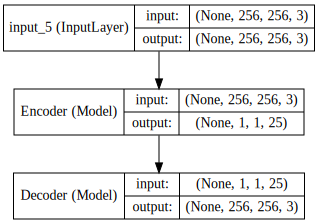

In [25]:
from IPython.display import SVG,display
from keras.utils.visualize_util import model_to_dot

display(SVG(model_to_dot(autoencoder,show_shapes=True).create(prog='dot', format='svg')))

Found 49924 images belonging to 1 classes.
Found 21396 images belonging to 1 classes.
(32, 256, 256, 3)


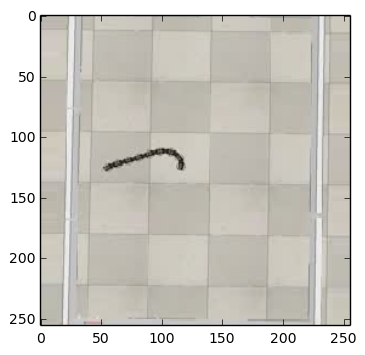

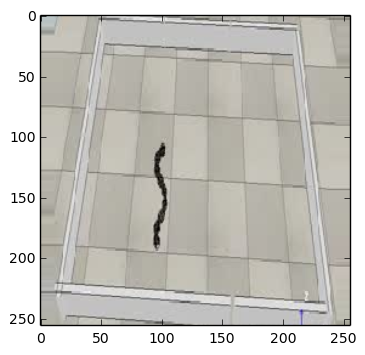

In [26]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import image

train_datagen = ImageDataGenerator(
        rescale=1./255,
        zoom_range=0.2,
        horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/home/ubuntu/SoftRobotRepresentation/Data/Training',
        target_size=(imDim, imDim), shuffle=False,
        batch_size=batchSz)

validation_generator = val_datagen.flow_from_directory(
        '/home/ubuntu/SoftRobotRepresentation/Data/Validation',
        target_size=(imDim, imDim),
        batch_size=batchSz)

X_batch,y_batch = train_generator.next()
X_batch = X_batch.transpose(0,2,3,1)
print X_batch.shape
plt.figure()
plt.imshow(X_batch[0,:])
plt.figure()
plt.imshow(X_batch[3,:])

# model.fit_generator(
#         train_generator,
#         samples_per_epoch=2000,
#         nb_epoch=50,
#         validation_data=validation_generator,
#         nb_val_samples=800)

In [27]:
## Let's test some learning rates
import numpy as np
from numpy import random
import tqdm
from IPython.core.debugger import Pdb

def trainModel(numEpochs,numBatchesPerEpoch,nVal,model,trainGenerator,validationGenarator):
    loss = []
    validation = []
    
    Pdb().set_trace()
    
    Xtrain = np.empty(shape=(1,3,imDim,imDim))
    for i in range(numBatchesPerEpoch):
        train,_ = trainGenerator.flow()
        Xtrain = np.concatenate(X_train,train)
        
    Xval = np.empty(shape=(1,3,imDim,imDim))
    for i in range(round(nVal/batchSz)):
        val,_ = validationGenarator.flow()
        Xval = np.concatenate(Xval,val)
        
    for i in range(numEpochs):
        print "Epoch %d of %d" (i+1,numEpochs)
        for j in tqdm(range(numBatchesPerEpoch)):
            Xbatch = Xtrain[j*batchSz:(j+1):batchSz,:]
            loss.append(model.train_on_batch(Xbatch,Xbatch))
        Xbatch, _ = validation_generator.flow()
        validation.append(model.test_on_batch(Xval,Xval))
        print "Epoch %d, loss = %f, val = %f" (i+1,loss[-1],validation[-1])
        
    return [loss, validation]

In [67]:
## Let's test some learning rates
from keras.optimizers import Adam
import numpy as np
from numpy import random

losses = []
vals = []

numEpochs = 20
numBatchesPerEpoch = 50
nVal = 200
for lr in 10**random.uniform(-6,-1,size=10):
    print "Learning rate=" + str(lr)
    autoencoder.compile(optimizer=Adam(lr=lr),loss='mse')
    [loss,val] = trainModel(numEpochs=numEpochs,
                            numBatchesPerEpoch=numBatchesPerEpoch,
                            nVal=nVal,model=autoencoder,
                            trainGenerator=train_datagen,
                            validationGenerator=val_datagen)
    losses.append(loss)
    vals.append(val)

Learning rate=4.05036422007e-05
Learning rate=0.000380179490501
Learning rate=3.49026471902e-05
Learning rate=0.000325850600325
Learning rate=0.0234695701405
Learning rate=1.46879776831e-06
Learning rate=0.0228056196809
Learning rate=7.53533295017e-06
Learning rate=0.000336383339945
Learning rate=8.52734166039e-06


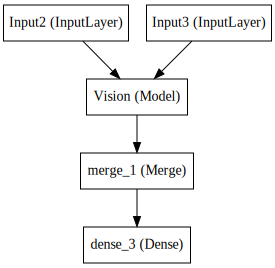

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
Input2 (InputLayer)              (None, 1, 27, 27)     0                                            
____________________________________________________________________________________________________
Input3 (InputLayer)              (None, 1, 27, 27)     0                                            
____________________________________________________________________________________________________
Vision (Model)                   multiple              37568       Input2[0][0]                     
                                                                   Input3[0][0]                     
____________________________________________________________________________________________________
merge_1 (Merge)                  (None, 15488)         0           Vision[1][0]            

In [14]:
from keras.layers import merge, Convolution2D, MaxPooling2D, Input, Dense, Flatten
from keras.models import Model

# first, define the vision modules
digit_input = Input(shape=(1, 25, 25),name="Input1")
x = Convolution2D(64, 3, 3)(digit_input)
x = Convolution2D(64, 3, 3)(x)
x = MaxPooling2D((2, 2))(x)
out = Flatten()(x)

vision_model = Model(digit_input, out,name="Vision")

# then define the tell-digits-apart model
digit_a = Input(shape=(1, 27, 27),name="Input2")
digit_b = Input(shape=(1, 27, 27),name="Input3")

# the vision model will be shared, weights and all
out_a = vision_model(digit_a)
out_b = vision_model(digit_b)

concatenated = merge([out_a, out_b], mode='concat')
out = Dense(1, activation='sigmoid')(concatenated)

classification_model = Model([digit_a, digit_b], out)

from IPython.display import SVG,display
from keras.utils.visualize_util import model_to_dot

display(SVG(model_to_dot(classification_model).create(prog='dot', format='svg')))

classification_model.summary()

In [ ]:
# Now let's create an auto encoder
